
# Introduction
The dataset is about laptops configuration with prices containing 1273 laptop data with 12 columns Company name,type namee, laptop size in (inches), Screen resolution, CPU, RAM, Memory, GP, Operating system, Price in INR.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import datetime as dt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.metrics import r2_score

# Reading Data


In [2]:
df= pd.read_csv('laptopData.csv')

In [3]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.drop(columns={'Unnamed: 0'}, inplace = True)

In [5]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


- Some columns types need changing as : Inches , Cpu , Ram , Memory ,and Weight

In [7]:
df.describe()


,Price
count,1273.000000
mean,59955.814073
std,37332.251005
min,9270.720000
25%,31914.720000
50%,52161.120000
75%,79333.387200
max,324954.720000


- Prices need to be changed to Dollars , but i think there are high outliers

In [8]:
df.describe(include='O')

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273
unique,19,6,25,40,118,10,40,110,9,189
top,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,290,710,640,495,183,601,401,271,1047,111


In [9]:
df.isna().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [10]:
## Checking null values
df[df.isnull().any(axis=1)]

## As they are 30 rows , I will drop all these rows
df.dropna(inplace=True)

In [11]:
## Check for duplicates
df.duplicated().sum()


29

In [12]:
## Dropping duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.nunique().sort_values(ascending=False)

Price               777
Weight              189
Cpu                 118
Gpu                 110
ScreenResolution     40
Memory               40
Inches               25
Company              19
Ram                  10
OpSys                 9
TypeName              6
dtype: int64

In [14]:
cats = df.select_dtypes(include='O').columns
for i in cats:
    if df[i].nunique() <= 199:
        print('Value Counts in ',i)
        print(df[i].value_counts())
        print('-----------------------------------------')

Value Counts in  Company
Company
Lenovo       282
Dell         281
HP           260
Asus         149
Acer         101
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64
-----------------------------------------
Value Counts in  TypeName
TypeName
Notebook              689
Gaming                203
Ultrabook             189
2 in 1 Convertible    112
Workstation            29
Netbook                22
Name: count, dtype: int64
-----------------------------------------
Value Counts in  Inches
Inches
15.6    621
14      188
17.3    162
13.3    157
12.5     38
11.6     29
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      

#### Final notes
- Screen Resolution ,Gpu , Cpu ,and Memory need Feature Engineering
- some features has ? as a value
- Prices will be converted to Dollars
- Ram and weight : units will be removed & will be converted to numerical values


In [15]:
## Replacing all ? with Nan
df.replace('?',np.nan,inplace=True)

#  Data Cleanning & Preprocessing

#### Ram , Inches ,and weights

In [16]:
## Removing Characters of Ram , Inches
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

## Changing their values to numerical values
df['Ram']=pd.to_numeric(df['Ram'], errors='coerce')
df['Weight']=pd.to_numeric(df['Weight'],errors='coerce')
df['Inches']= pd.to_numeric(df['Inches'],errors='coerce')

## Rename Columns
df.rename(columns={'Ram':'RamGB','Weight' :'WeightKG'}, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1243 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   RamGB             1244 non-null   int64  
 6   Memory            1243 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   WeightKG          1243 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 116.6+ KB


- There is one Nun Column appeared 

In [18]:
df.isna().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
RamGB               0
Memory              1
Gpu                 0
OpSys               0
WeightKG            1
Price               0
dtype: int64

#### Price To dollars
- 1 Indian Rupee equals 0.012 United States Dollar

In [19]:
## Changing Price to dollars
df['Price'] = df['Price'] * 0.012

### CPU 

In [20]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     126
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 6440HQ 2.6GHz      1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [21]:
## Extracting GHz from Cpu 
df['GHz'] = df['Cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
df['GHz'] = df['GHz'].str.replace(r'GHz','',regex=True)

## Converting GHz column to numeric
df['GHz'] = pd.to_numeric(df['GHz'],errors='coerce')

## Removing GHz from original Cpu
df['Cpu'] = df['Cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)','',regex=True) 


In [22]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U      186
Intel Core i7 7700HQ     143
Intel Core i7 7500U      127
Intel Core i3 6006U       79
Intel Core i7 8550U       72
                        ... 
AMD E-Series E2-9000       1
Intel Core M M3-6Y30       1
AMD A6-Series 7310         1
Intel Atom Z8350           1
AMD A9-Series 9410         1
Name: count, Length: 93, dtype: int64

In [23]:
## Cpu Brand
df['CpuBrand']= df['Cpu'].str.extract(r'^(\w+)')
df['CpuBrand'].value_counts()

CpuBrand
Intel      1183
AMD          60
Samsung       1
Name: count, dtype: int64

In [24]:
df[df['CpuBrand']=='Samsung']

,Company,TypeName,Inches,ScreenResolution,Cpu,RamGB,Memory,Gpu,OpSys,WeightKG,Price,GHz,CpuBrand
1191,Samsung,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,421.33824,2.0,Samsung


- We need to take good care to that when splitting

In [25]:
## Cpu Version
df['CpuVersion'] = df['Cpu'].str.replace(r'^(\w+)','',regex=True)


In [26]:
## Drop Old Cpu Column
df.drop(columns={'Cpu'},inplace=True)

#### Memory

In [27]:
df.Memory.value_counts()

Memory
256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

- There are Different types : SSD , Hybrid , FlashStorage ,and HDD
- Some laptops have Extra memory

In [28]:
## Remove GB & TB from Numbers
df['Memory'] = df['Memory'].str.replace(r'GB|\.0', '' ,regex=True)
df['Memory'] = df['Memory'].str.replace(r'TB','000',regex=True)

df['Memory'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '128 SSD +  1000 HDD',
       '256 SSD +  256 SSD', '64 Flash Storage', '32 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '1000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD', nan,
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '512 SSD +  1000 Hybrid', '256 SSD +  1000 Hybrid'], dtype=object)

In [29]:
## Main & Extra Memory column creation
df['MainMemory']= df['Memory'].str.replace(r' ','').str.split('+', n = 1, expand = True)[0]
df['SecondMemory']=df['Memory'].str.replace(r' ','').str.split('+', n = 1, expand = True)[1]
print('MainMemory Values: ',df['MainMemory'].unique())
print('SecondMemory Values: ',df['SecondMemory'].unique())



MainMemory Values:  ['128SSD' '128FlashStorage' '256SSD' '512SSD' '500HDD' '256FlashStorage'
 '1000HDD' '64FlashStorage' '32FlashStorage' '32SSD' '2000HDD' '64SSD'
 '1000Hybrid' '1000SSD' '16SSD' '16FlashStorage' '180SSD' '32HDD' nan
 '512FlashStorage' '128HDD' '240SSD' '8SSD' '508Hybrid']
SecondMemory Values:  [None '1000HDD' '256SSD' '2000HDD' '500HDD' '512SSD' nan '1000Hybrid']


In [30]:
## Main & Extra Memories type
df['MainMemoryType'] = df['MainMemory'].str.extract(r'(\D+)')
df['SecondMemoryType'] = df['SecondMemory'].str.extract(r'(\D+)')

## Removing Type from Memory Columns
df['MainMemory'] = df['MainMemory'].str.extract(r'(\d+)',)
df['SecondMemory'] = df['SecondMemory'].str.extract(r'(\d+)',)

## Changing Memory to Numerical 
df['MainMemory'] = pd.to_numeric(df['MainMemory'],errors='coerce')
df['SecondMemory']= pd.to_numeric(df['SecondMemory'],errors= 'coerce')


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1243 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   RamGB             1244 non-null   int64  
 5   Memory            1243 non-null   object 
 6   Gpu               1244 non-null   object 
 7   OpSys             1244 non-null   object 
 8   WeightKG          1243 non-null   float64
 9   Price             1244 non-null   float64
 10  GHz               1244 non-null   float64
 11  CpuBrand          1244 non-null   object 
 12  CpuVersion        1244 non-null   object 
 13  MainMemory        1243 non-null   float64
 14  SecondMemory      204 non-null    float64
 15  MainMemoryType    1243 non-null   object 
 16  SecondMemoryType  204 non-null    object 
dtype

In [32]:
## Drop the original Memory Column
df.drop(columns={'Memory'},inplace=True)

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,RamGB,Gpu,OpSys,WeightKG,Price,GHz,CpuBrand,CpuVersion,MainMemory,SecondMemory,MainMemoryType,SecondMemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,2.3,Intel,Core i5,128.0,NaN,SSD,NaN
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,574.746278,1.8,Intel,Core i5,128.0,NaN,FlashStorage,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,367.632000,2.5,Intel,Core i5 7200U,256.0,NaN,SSD,NaN
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,1622.344032,2.7,Intel,Core i7,512.0,NaN,SSD,NaN
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,3.1,Intel,Core i5,256.0,NaN,SSD,NaN


In [34]:
df.isna().sum()

Company                0
TypeName               0
Inches                 1
ScreenResolution       0
RamGB                  0
Gpu                    0
OpSys                  0
WeightKG               1
Price                  0
GHz                    0
CpuBrand               0
CpuVersion             0
MainMemory             1
SecondMemory        1040
MainMemoryType         1
SecondMemoryType    1040
dtype: int64

In [35]:
df['SecondMemory'].replace(np.nan,0,inplace=True)
df['MainMemory'].replace(np.nan,0,inplace=True)
df['SecondMemoryType'].replace(np.nan,'None',inplace=True)

In [36]:
df.isna().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
RamGB               0
Gpu                 0
OpSys               0
WeightKG            1
Price               0
GHz                 0
CpuBrand            0
CpuVersion          0
MainMemory          0
SecondMemory        0
MainMemoryType      1
SecondMemoryType    0
dtype: int64

### Screen Resolutions

In [37]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                493
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2880

- The screen resolution column consists of : Panel Type , Touchscreen , Quality ,and Resolution
- The Quality & Resolution are the same , so we will only keep one of them


#### Create a column for touchscreen laptops

In [38]:
## TouchScreen Column
df['TouchScreen'] =df["ScreenResolution"].str.contains("TouchScreen", na=False, case=False)
print(df.TouchScreen.value_counts())

## Change it into 1 and 0
df['TouchScreen'] = df['TouchScreen'].astype(int)
print(df.TouchScreen.value_counts())

TouchScreen
False    1063
True      181
Name: count, dtype: int64
TouchScreen
0    1063
1     181
Name: count, dtype: int64


- Need to take of that when splitting

#### Create a column for resolution

In [39]:
## Extract resolution using Regular Experision
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')


#### Create a column for PanelType

In [40]:
## Removing all Features from cell , leaving only Panel Type
df['PanelType'] = df['ScreenResolution'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD|Touchscreen|(\d+x\d+))','',regex=True)
df['PanelType'].unique()

array(['IPS Panel Retina Display ', '', ' ', 'IPS Panel  ',
       'IPS Panel    ', '   ', 'IPS Panel '], dtype=object)

In [41]:
## Combining all Values of IPS Panal
df['PanelType'] = df['PanelType'].replace(r' ','',regex=True)
df['PanelType'].unique()

array(['IPSPanelRetinaDisplay', '', 'IPSPanel'], dtype=object)

In [42]:
## replace '' , with Nan
df['PanelType'] = df['PanelType'].replace(r'^\s*$', 'Without', regex=True)
df.PanelType.value_counts()

PanelType
Without                  893
IPSPanel                 334
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,RamGB,Gpu,OpSys,WeightKG,Price,GHz,CpuBrand,CpuVersion,MainMemory,SecondMemory,MainMemoryType,SecondMemoryType,TouchScreen,Resolution,PanelType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,2.3,Intel,Core i5,128.0,0.0,SSD,None,0,2560x1600,IPSPanelRetinaDisplay
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,574.746278,1.8,Intel,Core i5,128.0,0.0,FlashStorage,None,0,1440x900,Without
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,367.632000,2.5,Intel,Core i5 7200U,256.0,0.0,SSD,None,0,1920x1080,Without
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,1622.344032,2.7,Intel,Core i7,512.0,0.0,SSD,None,0,2880x1800,IPSPanelRetinaDisplay
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,3.1,Intel,Core i5,256.0,0.0,SSD,None,0,2560x1600,IPSPanelRetinaDisplay


In [44]:
df.drop(columns={'ScreenResolution'},inplace=True)

In [45]:
## Checking Nan Values
df.isna().sum()

Company             0
TypeName            0
Inches              1
RamGB               0
Gpu                 0
OpSys               0
WeightKG            1
Price               0
GHz                 0
CpuBrand            0
CpuVersion          0
MainMemory          0
SecondMemory        0
MainMemoryType      1
SecondMemoryType    0
TouchScreen         0
Resolution          0
PanelType           0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1243 non-null   float64
 3   RamGB             1244 non-null   int64  
 4   Gpu               1244 non-null   object 
 5   OpSys             1244 non-null   object 
 6   WeightKG          1243 non-null   float64
 7   Price             1244 non-null   float64
 8   GHz               1244 non-null   float64
 9   CpuBrand          1244 non-null   object 
 10  CpuVersion        1244 non-null   object 
 11  MainMemory        1244 non-null   float64
 12  SecondMemory      1244 non-null   float64
 13  MainMemoryType    1243 non-null   object 
 14  SecondMemoryType  1244 non-null   object 
 15  TouchScreen       1244 non-null   int32  
 16  Resolution        1244 non-null   object 
 17  

In [47]:
df['MainMemory'] = pd.to_numeric(df['MainMemory'],errors='coerce')

### GPU

In [48]:
df['Gpu'].value_counts()
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

- We Can Only Split it into GPU brand & Version

In [49]:
## Cpu Brand

df['GpuBrand'] = df['Gpu'].str.extract(r'^(\w+)')
print('Brand',df['GpuBrand'].value_counts())

## GPU versions
df['GpuVersion'] = df['Gpu'].str.replace(r'^(\w+)','',regex=True)

## Drop Old column
df.drop(columns={'Gpu'},inplace=True)


Brand GpuBrand
Intel     684
Nvidia    389
AMD       170
ARM         1
Name: count, dtype: int64


In [50]:
df[df['GpuBrand']=='ARM']

,Company,TypeName,Inches,RamGB,OpSys,WeightKG,Price,GHz,CpuBrand,CpuVersion,MainMemory,SecondMemory,MainMemoryType,SecondMemoryType,TouchScreen,Resolution,PanelType,GpuBrand,GpuVersion
1191,Samsung,2 in 1 Convertible,12.3,4,Chrome OS,1.15,421.33824,2.0,Samsung,Cortex A72&A53,32.0,0.0,FlashStorage,None,1,2400x1600,IPSPanel,ARM,Mali T860 MP4


- I will Drop the Samsung Row as it will have no effect on data

In [51]:
df=df[df['GpuBrand']!='ARM']


In [52]:
df['MainMemory'] = pd.to_numeric(df['MainMemory'],errors='coerce')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1273
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1243 non-null   object 
 1   TypeName          1243 non-null   object 
 2   Inches            1242 non-null   float64
 3   RamGB             1243 non-null   int64  
 4   OpSys             1243 non-null   object 
 5   WeightKG          1242 non-null   float64
 6   Price             1243 non-null   float64
 7   GHz               1243 non-null   float64
 8   CpuBrand          1243 non-null   object 
 9   CpuVersion        1243 non-null   object 
 10  MainMemory        1243 non-null   float64
 11  SecondMemory      1243 non-null   float64
 12  MainMemoryType    1242 non-null   object 
 13  SecondMemoryType  1243 non-null   object 
 14  TouchScreen       1243 non-null   int32  
 15  Resolution        1243 non-null   object 
 16  PanelType         1243 non-null   object 
 17  

# EDA

### Univariate Analysis

In [54]:
df.head(1)

,Company,TypeName,Inches,RamGB,OpSys,WeightKG,Price,GHz,CpuBrand,CpuVersion,MainMemory,SecondMemory,MainMemoryType,SecondMemoryType,TouchScreen,Resolution,PanelType,GpuBrand,GpuVersion
0,Apple,Ultrabook,13.3,8,macOS,1.37,856.544198,2.3,Intel,Core i5,128.0,0.0,SSD,None,0,2560x1600,IPSPanelRetinaDisplay,Intel,Iris Plus Graphics 640


- What is Most frequent Company 

In [55]:
fig= px.bar( df , x=df['Company'].value_counts().index ,
           y= df['Company'].value_counts().values)
fig.update_xaxes(title='Brand')
fig.update_yaxes(title='Number of Sales')
fig.update_traces(marker_color='lightsalmon')

-Most Frequant Type of Laptops

In [56]:
fig= px.bar( df , x=df['TypeName'].value_counts().index ,
           y= df['TypeName'].value_counts().values)
fig.update_xaxes(title='Type')
fig.update_yaxes(title='Number of Sales')
fig.update_traces(marker_color='lightsalmon')

-Most Frequant Type of CPU & GPU

In [57]:
fig= px.bar( df , x=df['CpuVersion'].value_counts().nlargest(13).index ,
           y= df['CpuVersion'].value_counts().nlargest(13).values)
fig.update_xaxes(title='Type')
fig.update_yaxes(title='Number of Sales')
fig.update_traces(marker_color='lightsalmon')

In [58]:
fig= px.bar( df , x=df['GpuVersion'].value_counts().nlargest(13).index ,
           y= df['GpuVersion'].value_counts().nlargest(13).values)
fig.update_xaxes(title='Type')
fig.update_yaxes(title='Number of Sales')
fig.update_traces(marker_color='lightsalmon')

- Laptop Screen Sizes

In [59]:
px.histogram(data_frame=df,
             x='Inches')

- What is the price Range

In [60]:
px.box(data_frame=df,
             x='Price')

- Main Memory Storage Type

In [61]:
px.pie(data_frame = df,
        names= df['MainMemoryType'].value_counts().sort_index().index,
        values= df['MainMemoryType'].value_counts().sort_index().values,
        title = 'Main Laptop Memory Type ',
        hole = 0.5)

- Second Memory Types

In [62]:

fig= px.bar( df , x=df['SecondMemoryType'].value_counts().index ,
           y= df['SecondMemoryType'].value_counts().values)
fig.update_xaxes(title='Space')
fig.update_yaxes(title='Number of Sales')
fig.update_traces(marker_color='lightsalmon')

-Laptops with Touch Screens

In [63]:
## Creating a data frame with value counts of TouchScreens Laptops
count_T = df['TouchScreen'].value_counts()


## Creating Variables to be used in pie chart graph 
labels = [ 'No TouchScreen','TouchScreen']
values = count_T.values


## Pie chart 
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.update_layout(title='Touch Screen Or Not')
fig.show()

## Bi & Multi Variate analysis

In [64]:
df.head(1)

,Company,TypeName,Inches,RamGB,OpSys,WeightKG,Price,GHz,CpuBrand,CpuVersion,MainMemory,SecondMemory,MainMemoryType,SecondMemoryType,TouchScreen,Resolution,PanelType,GpuBrand,GpuVersion
0,Apple,Ultrabook,13.3,8,macOS,1.37,856.544198,2.3,Intel,Core i5,128.0,0.0,SSD,None,0,2560x1600,IPSPanelRetinaDisplay,Intel,Iris Plus Graphics 640


-Most Common Types by each Brands

In [65]:
## Creating a data frame by grouping
df1=df.groupby(['Company'])['TypeName'].value_counts().to_frame().sort_values(by='count',ascending=False)
df1=df1.reset_index()
df1

## Creating a bar chart to Vis

fig= px.bar( df1 , x=df1['TypeName'] ,
           y= df1['count']
        , color='Company'
        , barmode = 'group')
fig.update_xaxes(title='Type ')
fig.update_yaxes(title='Total Sales')


- Average Price Of each company

In [66]:
## Create a data frame with average price of each laptop
df1= df.groupby('Company')['Price'].mean().reset_index().nlargest(10,'Price')

## Create a bar chart with to Visu

px.bar(df1 ,
       x=df1['Company'] , 
       y='Price',
       title='Brands with their avg Price')



- Average Price of each Type

In [67]:
## Create a data frame with average price of each laptop
df1= df.groupby('TypeName')['Price'].mean().reset_index().nlargest(10,'Price')

## Create a bar chart with to Visu

px.bar(df1 ,
       x=df1['TypeName'] , 
       y='Price',
       title='Type with their avg Price')


- Relationship Between Price and RAM

In [68]:

## Creating a bar chart graph 
fig= px.scatter( df, x=df['RamGB'],
           y= df['Price'] ,trendline="ols" )
fig.update_xaxes(title='RAM')
fig.update_yaxes(title='Average Price')

In [69]:

## Creating a bar chart graph 
fig= px.scatter( df, x=df['GHz'],
           y= df['Price'] ,trendline="ols" )
fig.update_xaxes(title='GHz')
fig.update_yaxes(title='Average Price')

- CPU effect on price

In [70]:
px.box(data_frame=df,
             y='Price',
             color='CpuBrand')

-Correlation Map

In [71]:
## Correlation map
df.corr(numeric_only=True).T

,Inches,RamGB,WeightKG,Price,GHz,MainMemory,SecondMemory,TouchScreen
Inches,1.000000,0.141917,0.490564,0.041734,0.199383,0.179800,0.279549,-0.235505
RamGB,0.141917,1.000000,0.285718,0.681786,0.331988,0.009306,0.352430,0.090570
WeightKG,0.490564,0.285718,1.000000,0.175860,0.274208,0.143827,0.383895,-0.248800
Price,0.041734,0.681786,0.175860,1.000000,0.426580,-0.126032,0.292562,0.188202
GHz,0.199383,0.331988,0.274208,0.426580,1.000000,0.052306,0.229731,-0.091600
MainMemory,0.179800,0.009306,0.143827,-0.126032,0.052306,1.000000,-0.244858,-0.021966
SecondMemory,0.279549,0.352430,0.383895,0.292562,0.229731,-0.244858,1.000000,-0.132666
TouchScreen,-0.235505,0.090570,-0.248800,0.188202,-0.091600,-0.021966,-0.132666,1.000000


In [72]:
## Correlation data frame with price
df3 = df.corr(numeric_only=True)['Price'].sort_values(ascending=False).reset_index()
df3

,index,Price
0,Price,1.000000
1,RamGB,0.681786
2,GHz,0.426580
3,SecondMemory,0.292562
4,TouchScreen,0.188202
5,WeightKG,0.175860
6,Inches,0.041734
7,MainMemory,-0.126032


In [73]:
## Correlation Between Each feature
px.imshow(df.corr(numeric_only=True),text_auto=True)

-Quantiles and deteting outliers

In [74]:
df.quantile(numeric_only=True,q=[0.05,0.1,0.4,0.5,0.7, 0.8, 0.9, 0.95, 0.99, 0.995,1]).T

,0.050,0.100,0.400,0.500,0.700,0.800,0.900,0.950,0.990,0.995,1.000
Inches,12.500000,13.300000,15.600000,15.60000,15.600000,15.600000,17.300000,17.30000,17.300000,25.272000,35.60000
RamGB,4.000000,4.000000,8.000000,8.00000,8.000000,8.000000,16.000000,16.00000,32.000000,32.000000,64.00000
WeightKG,1.180500,1.260000,1.900000,2.04000,2.240000,2.450000,2.800000,3.35000,4.559000,5.718000,11.10000
Price,208.047744,255.099525,534.122623,632.32704,862.752384,1067.475456,1310.508979,1565.79264,2015.198784,2456.148753,3899.45664
GHz,1.200000,1.600000,2.400000,2.50000,2.600000,2.700000,2.800000,2.80000,3.000000,3.100000,3.60000
MainMemory,64.000000,128.000000,256.000000,256.00000,512.000000,804.800000,1000.000000,1000.00000,2000.000000,2000.000000,2000.00000
SecondMemory,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1000.000000,1000.00000,2000.000000,2000.000000,2000.00000
TouchScreen,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.00000


-Handling outliers

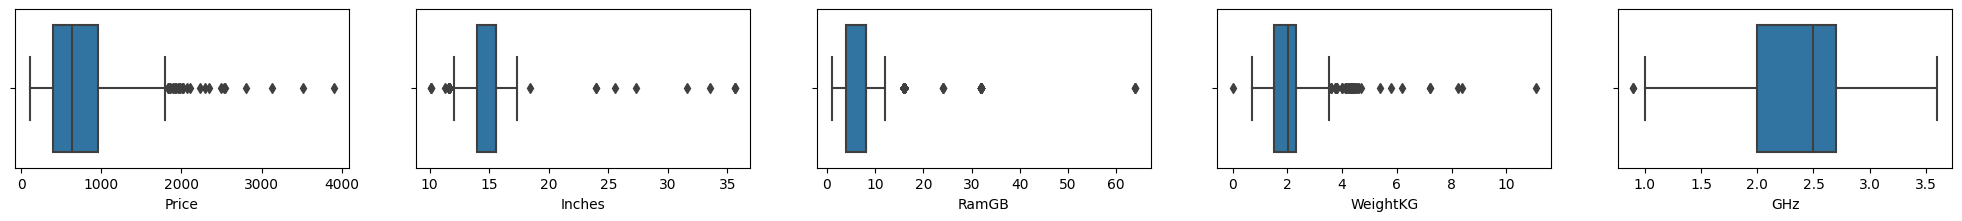

In [75]:
## visualizing  Outliers
numout = ['Price','Inches','RamGB','WeightKG','GHz']
plt.figure(figsize = (25 , 7))
for i , col in enumerate(numout,1):
    plt.subplot(3,5,i)
    sns.boxplot(data = df, x= col)

In [76]:
df = df[(df['Price']<3000)]
df = df[ (df['Inches']<30) ]
df = df[(df['WeightKG'] <10)]
df = df[(df['RamGB']<40)]

In [77]:
df.quantile(numeric_only=True,q=[0.05,0.1,0.4,0.5,0.7, 0.8, 0.9, 0.95, 0.99, 0.995,1]).T

,0.050,0.100,0.400,0.500,0.700,0.800,0.900,0.950,0.990,0.995,1.000
Inches,12.500000,13.300000,15.600000,15.60000,15.60000,15.600,17.300000,17.30000,17.300000,17.300000,27.30000
RamGB,4.000000,4.000000,8.000000,8.00000,8.00000,8.000,16.000000,16.00000,32.000000,32.000000,32.00000
WeightKG,1.184000,1.260000,1.900000,2.04000,2.24000,2.430,2.800000,3.30600,4.477600,5.302000,8.40000
Price,207.408384,255.098246,532.076671,632.32704,862.49664,1054.944,1308.501389,1561.95648,1961.480268,2103.967526,2806.15104
GHz,1.200000,1.600000,2.400000,2.50000,2.60000,2.700,2.800000,2.80000,3.000000,3.100000,3.60000
MainMemory,64.000000,128.000000,256.000000,256.00000,512.00000,512.000,1000.000000,1000.00000,2000.000000,2000.000000,2000.00000
SecondMemory,0.000000,0.000000,0.000000,0.00000,0.00000,0.000,1000.000000,1000.00000,2000.000000,2000.000000,2000.00000
TouchScreen,0.000000,0.000000,0.000000,0.00000,0.00000,0.000,1.000000,1.00000,1.000000,1.000000,1.00000


<Axes: xlabel='Price', ylabel='Count'>

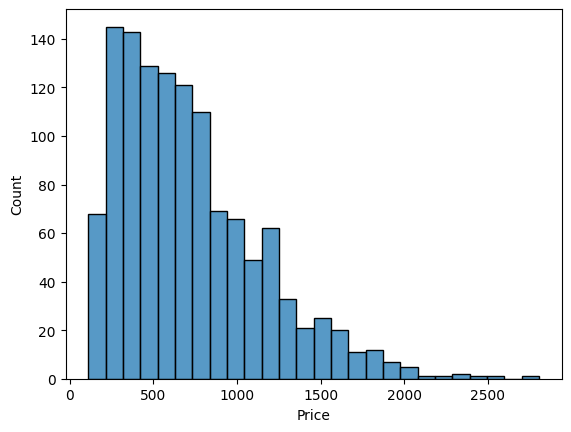

In [78]:
sns.histplot(df['Price'])

<Axes: xlabel='Price', ylabel='Count'>

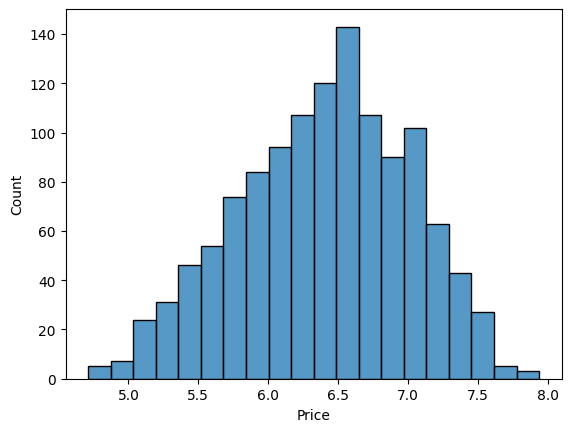

In [79]:
sns.histplot(np.log(df['Price']))

## Saving a Cleaned Version of Data

In [80]:
df.to_csv('laptop-clean.csv', index=False)

# Machine Learning Model

## Data Splitting

In [81]:

## Filling Nan
df.fillna('None',inplace=True)
df.to_csv('laptop-clean.csv',index=False)
# importing Libraries
from sklearn.model_selection import train_test_split

# Data Splitting into features and target
X = df.drop('Price', axis=1)
y = np.log(df['Price'])


# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X[['CpuBrand','TouchScreen']])

In [82]:
X.describe()

,Inches,RamGB,WeightKG,GHz,MainMemory,SecondMemory,TouchScreen
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,15.062083,8.345810,2.072197,2.303190,438.766477,175.166802,0.143206
std,1.537880,4.752338,0.771942,0.503924,356.686892,409.823235,0.350425
min,10.100000,1.000000,0.000200,0.900000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,1.500000,2.000000,256.000000,0.000000,0.000000
50%,15.600000,8.000000,2.040000,2.500000,256.000000,0.000000,0.000000
75%,15.600000,8.000000,2.320000,2.700000,512.000000,0.000000,0.000000
max,27.300000,32.000000,8.400000,3.600000,2000.000000,2000.000000,1.000000


In [83]:
X.describe(include='O')

,Company,TypeName,OpSys,CpuBrand,CpuVersion,MainMemoryType,SecondMemoryType,Resolution,PanelType,GpuBrand,GpuVersion
count,1229,1229,1229,1229,1229,1229,1229,1229,1229,1229,1229
unique,19,6,9,2,89,5,4,15,3,3,108
top,Lenovo,Notebook,Windows 10,Intel,Core i5 7200U,SSD,None,1920x1080,Without,Intel,HD Graphics 620
freq,278,685,1010,1170,186,804,1025,807,883,678,268


## Data Pre-Processing

#### Handling Nans

In [84]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
RamGB               0
OpSys               0
WeightKG            0
Price               0
GHz                 0
CpuBrand            0
CpuVersion          0
MainMemory          0
SecondMemory        0
MainMemoryType      0
SecondMemoryType    0
TouchScreen         0
Resolution          0
PanelType           0
GpuBrand            0
GpuVersion          0
dtype: int64

In [85]:
df['PanelType'].value_counts()

PanelType
Without                  883
IPSPanel                 329
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

- Handling Nans
As Nan Values here in Panel type means they don't have IPS panel type ,so we will fill it with None as String Value

In [86]:
X.isna().sum()

Company             0
TypeName            0
Inches              0
RamGB               0
OpSys               0
WeightKG            0
GHz                 0
CpuBrand            0
CpuVersion          0
MainMemory          0
SecondMemory        0
MainMemoryType      0
SecondMemoryType    0
TouchScreen         0
Resolution          0
PanelType           0
GpuBrand            0
GpuVersion          0
dtype: int64

In [87]:
cat_cols = X.select_dtypes(include = 'O').columns.tolist()
print('Categorical Columns :', cat_cols)
num_cols = X.select_dtypes(exclude='O').columns.tolist()
print('Numerical Columns :', num_cols)

Categorical Columns : ['Company', 'TypeName', 'OpSys', 'CpuBrand', 'CpuVersion', 'MainMemoryType', 'SecondMemoryType', 'Resolution', 'PanelType', 'GpuBrand', 'GpuVersion']
Numerical Columns : ['Inches', 'RamGB', 'WeightKG', 'GHz', 'MainMemory', 'SecondMemory', 'TouchScreen']


## Category Encoding
from category_encoders import BinaryEncoder
enc = BinaryEncoder(cols=cat_cols)
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

## Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [88]:
print(num_cols)
print(cat_cols)

['Inches', 'RamGB', 'WeightKG', 'GHz', 'MainMemory', 'SecondMemory', 'TouchScreen']
['Company', 'TypeName', 'OpSys', 'CpuBrand', 'CpuVersion', 'MainMemoryType', 'SecondMemoryType', 'Resolution', 'PanelType', 'GpuBrand', 'GpuVersion']


In [89]:
## Pre-Processing 
# Data Preprocessing
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('binary', BinaryEncoder())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Inches', 'RamGB', 'WeightKG', 'GHz', 
                                        'MainMemory', 'SecondMemory', 'TouchScreen']),
        ('cat', categorical_transformer, ['Company', 'TypeName', 'OpSys', 'CpuBrand', 'CpuVersion'
                                          ,'MainMemoryType', 'SecondMemoryType', 
                                          'Resolution', 'PanelType', 'GpuBrand', 'GpuVersion'])])
X_train = preprocessor.fit_transform(X_train)
X_test  = preprocessor.transform(X_test)

# Models Creation

### Linear Regression

In [90]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Training Score: ', lr.score(X_train, y_train))
print('Testing Score: ', lr.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

Training Score:  0.8273722911868471
Testing Score:  0.816596161254479
RMSE:  0.26070538271996363


### SVR

In [91]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

print('Training Score: ', svr.score(X_train, y_train))

print('Testing Score: ', svr.score(X_test, y_test))

Training Score:  0.9520577429023247
Testing Score:  0.8920236573745821


### KNN

In [92]:
from sklearn.neighbors import KNeighborsRegressor

train_acc, test_acc = [], []
for i in range(1,40,2):
    knn_model = KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
    train_acc.append(knn_model.score(X_train, y_train))
    test_acc.append(knn_model.score(X_test, y_test))
    
fig = px.line(x= range(1,40,2),y=[train_acc, test_acc], title = 'Train vs. Valid ACC')
fig.update_layout(xaxis_title="Value of K",yaxis_title="Accuracy",legend_title="Train vs Valid")
fig.data[0].name = "Train Acc"
fig.data[1].name = "Valid Acc"
fig.show()

- Best n is 9

In [93]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
print('TrainingScore: ',knn.score(X_train,y_train))
print('Test Score: ',knn.score(X_test, y_test))

TrainingScore:  0.8669650507017508
Test Score:  0.8545187167226628


### Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=100)

rf.fit(X_train, y_train)

print('Training Score: ', rf.score(X_train, y_train))
print('Testing Score: ', rf.score(X_test, y_test))


Training Score:  0.9832266948486625
Testing Score:  0.9068056947033224


- Feature Importance

### Comparison

In [95]:
models = [lr, rf, svr , knn]
dic = {}
for model in models:
    model.fit(X_train, y_train)
    dic[model] =  model.score(X_test, y_test)

pd.DataFrame(dic, index=['Score'])

LinearRegression()   
Score            0.816596  \

       (DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1608637542), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1273642419), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1935803228), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=787846414), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=996406378), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1201263687), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=423734972), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=415968276), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=670094950), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1914837113), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=669991378), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=429389014), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=249467210), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1972458954), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1572714583), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1433267572), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=434285667), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=613608295), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=893664919), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=648061058), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=88409749), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=242285876), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=2018247425), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=953477463), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1427830251), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1883569565), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=911989541), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=3344769), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=780932287), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=2114032571), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=787716372), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=504579232), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1306710475), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=479546681), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=106328085), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=30349564), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1855189739), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=99052376), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1250819632), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=106406362), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=480404538), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1717389822), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=599121577), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=200427519), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1254751707), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=2034764475), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1573512143), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=999745294), DecisionTreeRegressor(max_depth=100, max_features=1.0, random_state=1958805693), Decis

- So far the best model is Random Forest by 90.5% accuracy

# Voting Regressor

In [96]:
## Library
from sklearn.ensemble import  VotingRegressor

# Voting Regressor
voting_reg = VotingRegressor(estimators=[('lr', lr), ('rf', rf), ('svr', svr)])

# Fitting the data
voting_reg.fit(X_train, y_train)

# Checking the score
print('Training Score: ', voting_reg.score(X_train, y_train))
print('Testing Score: ', voting_reg.score(X_test, y_test))

Training Score:  0.946982651876809
Testing Score:  0.9010001959565035


# Bagging Regressor

In [97]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

## Decision Tree
dt_reg = DecisionTreeRegressor(max_depth=10)

bag_reg = BaggingRegressor(dt_reg, n_estimators=200, bootstrap=True, random_state=42,
                           max_features=0.8)
                           

# Fitting the data
bag_reg.fit(X_train, y_train)

# Checking the score
print('Training Score: ', bag_reg.score(X_train, y_train))
print('Testing Score: ', bag_reg.score(X_test, y_test))

Training Score:  0.9630728802167475
Testing Score:  0.9134393037098206


# XGBoost

In [98]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, max_depth=3, random_state=42)

# Fitting the data
xgb.fit(X_train, y_train)

# Checking the score
print('Training Score: ', xgb.score(X_train, y_train))
print('Testing Score: ', xgb.score(X_test, y_test))

Training Score:  0.9796472177778806
Testing Score:  0.9209942754039977


# Cross Validation

In [99]:
## Import library
from sklearn.model_selection import cross_val_score

# Models
for i in range (2,6):
    lin_reg_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=i)
    rf_reg_scores = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=i)
    svr_reg_score = cross_val_score(SVR(), X_train, y_train, cv=i)

    # Models scores
    print('CV = ',i)
    print('Linear Regression Mean Score: ', lin_reg_scores.mean().round(3))
    print('Random Forest Mean Score: ', rf_reg_scores.mean().round(3))
    print('SVR: ', svr_reg_score.mean().round(3))
    print('----------------------------')

CV =  2
Linear Regression Mean Score:  0.79
Random Forest Mean Score:  0.838
SVR:  0.851
----------------------------
CV =  3
Linear Regression Mean Score:  0.794
Random Forest Mean Score:  0.861
SVR:  0.867
----------------------------
CV =  4
Linear Regression Mean Score:  0.792
Random Forest Mean Score:  0.861
SVR:  0.862
----------------------------
CV =  5
Linear Regression Mean Score:  0.79
Random Forest Mean Score:  0.867
SVR:  0.872
----------------------------


# Hyperparameter Tuning

In [100]:
# importing library
from sklearn.model_selection import GridSearchCV

In [101]:
# Tuning Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, ],
    'max_features': [0.2, 0.4, 0.6]
}

dt_grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)

# Fitting the data
dt_grid.fit(X_train, y_train)

# Best Parameters
print('Best Parameters: ', dt_grid.best_params_)
print('Best Score: ', dt_grid.best_score_)

# Checking the score
print('Training Score: ', dt_grid.score(X_train, y_train))
print('Testing Score: ', dt_grid.score(X_test, y_test))
              

Best Parameters:  {'max_features': 0.2, 'n_estimators': 200}
Best Score:  0.8755716657450591
Training Score:  0.9844657623121658
Testing Score:  0.9106167514980162


# Final Thoughts

In [102]:
y_pred = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

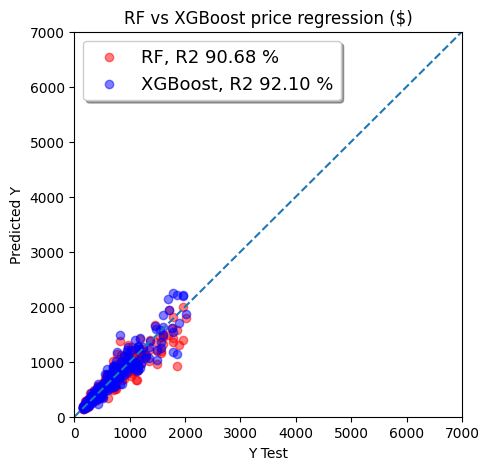

In [103]:
plt.figure(figsize = (5,5))
plt.scatter(np.exp(y_test), np.exp(y_pred), alpha=0.5, color='red',label='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred)*100))
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb), alpha=0.5, color='blue',label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100))
plt.plot([0, 7000], [0, 7000], linestyle='--')
plt.axis([0, 7000, 0, 7000])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('RF vs XGBoost price regression ($)')
plt.legend(loc='upper left', ncol=1, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

# Model Saving

In [104]:
# Preprocessor Saving
import pickle
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))

# Model Saving
pickle.dump(xgb, open('model.pkl', 'wb'))

In [111]:
np.sort(df['GHz'].unique())[1:]

array([1.1 , 1.2 , 1.3 , 1.44, 1.5 , 1.6 , 1.8 , 1.9 , 1.92, 2.  , 2.1 ,
       2.2 , 2.3 , 2.4 , 2.5 , 2.6 , 2.7 , 2.8 , 2.9 , 3.  , 3.1 , 3.2 ,
       3.6 ])

In [146]:
Company = 'HP'
TypeName = 'Gaming'

In [147]:
df[df['Company']== Company].groupby('TypeName')['TypeName'].value_counts().index

Index(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Workstation'],
      dtype='object', name='TypeName')

In [163]:
np.sort(df[(df['Company']== Company)&(df['TypeName'] ==TypeName)].groupby('WeightKG')['WeightKG'].count().index)

array([2.2 , 2.62, 2.75, 3.35, 3.74, 3.78])

# Streamlit Model

In [187]:
%%writefile app.py
# Import libraries

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from PIL import Image
import pickle
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Page layout
st.set_page_config(layout='wide' )

# Image
image = Image.open('Picture.png')

# Credits
with st.container():
    st.write('Author : @MostafaAbdelbadie')
    st.write('Linkdin : https://www.linkedin.com/in/mostafa-abdelbadie')
    st.write('Whatsapp Number : (+20) 1142359150')
    st.title('Laptops Prices Prediction\n')
    st.write('- <p style="font-size:26px;">This is a prediciton model made to predict the prices of laptops based on their featurs ,A more comprehansive analysis is available on my Github</p>',
    unsafe_allow_html=True)
    st.write('- <p style="font-size:26px;"> Feel free to contact me to recieve the dataset & python notebook</p>',
    unsafe_allow_html=True)
    coll1, coll2, coll3 = st.columns([3,6,1])

    with coll1:
            st.write("     ")

    with coll2:
            st.image(image , width= 800)
            

    with coll3:
            st.write("")

# Load Cleaned data
df = pd.read_csv('laptop-clean.csv')

# Load Preprocessor
preprocessor = pickle.load(open('preprocessor.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

# Inputs

# Brand & Type
st.write('- <p style="font-size:26px;"> Laptop Brand & Type</p>',unsafe_allow_html=True)
Company = st.selectbox('Company',df['Company'].unique())
TypeName = st.selectbox('Type',df[df['Company']== Company].groupby('TypeName')['TypeName'].value_counts().index)
WeightKG = st.selectbox('Weight?', np.sort(df[(df['Company']== Company)&(df['TypeName'] ==TypeName)].groupby('WeightKG')['WeightKG'].count().index))
# Screen Inputs
st.write('- <p style="font-size:26px;"> Screen Specs</p>',unsafe_allow_html=True)
TouchScreen = st.selectbox('Does it has a Touch Screen?',('Yes','No'))
if TouchScreen == 'Yes':
        TouchScreen = 1
else:
        TouchScreen = 0
PanelType = st.selectbox(('PanelType'),df['PanelType'].unique())
Resolution = st.selectbox('Resolution',np.sort(df[(df['Company']== Company)&(df['TypeName'] ==TypeName)].groupby('Resolution')['Resolution'].count().index))
Inches = st.number_input('Inches',df[(df['Company']== Company)&(df['TypeName'] ==TypeName)].groupby('Inches')['Inches'].count().index[0],df[(df['Company']== Company)&(df['TypeName'] ==TypeName)].groupby('Inches')['Inches'].count().index[-1])

# Specs
## Processor & Ram
st.write('- <p style="font-size:26px;"> Processor</p>',unsafe_allow_html=True)
RamGB = st.selectbox('Ram GB', np.sort(df[(df['Company']== Company)&(df['TypeName'] ==TypeName)].groupby('RamGB')['RamGB'].count().index))
CpuBrand = st.selectbox('Cpu Brand',np.sort(df[(df['Company']== Company)&(df['TypeName'] ==TypeName)].groupby('CpuBrand')['CpuBrand'].count().index))
GHz = st.selectbox('GHz',np.sort(df[(df['Company']== Company)&(df['TypeName'] ==TypeName)&(df['CpuBrand']==CpuBrand)].groupby('GHz')['GHz'].count().index))
CpuVersion = st.selectbox('Cpu Version',np.sort(df[(df['Company']== Company)&(df['TypeName'] ==TypeName)&(df['CpuBrand']==CpuBrand) &(df['GHz']==GHz)].groupby('CpuVersion')['CpuVersion'].count().index))

## Hard 
st.write('- <p style="font-size:26px;"> Hard disk capcity</p>',unsafe_allow_html=True)
MainMemory = st.selectbox('Main Memory GB',np.sort(df[(df['Company']== Company)&(df['TypeName'] ==TypeName)].groupby('MainMemory')['MainMemory'].count().index))
MainMemoryType = st.selectbox('Main Memory Type',df[(df['Company']== Company)&(df['MainMemory']==MainMemory)].groupby('MainMemoryType')['MainMemoryType'].count().index)
st.write('Does it has an Extra Hard driver?')
secMem = st.checkbox(label='Yes')
if secMem:
        st.write('Please enter Second Memory specs')
        SecondMemory = st.selectbox('Second Memory GB',np.sort(df['SecondMemory'].unique())[1:])
        SecondMemoryType = st.selectbox('Second Memory Type',df['SecondMemoryType'].unique()[1:])
else:
        SecondMemory = 0.0
        SecondMemoryType = 'None'

## Vega Card
st.write('- <p style="font-size:26px;"> Vega Card</p>',unsafe_allow_html=True)
GpuBrand = st.selectbox('Gpu Brand',np.sort(df[(df['Company']== Company)&(df['TypeName'] ==TypeName)].groupby('GpuBrand')['GpuBrand'].count().index))
GpuVersion = st.selectbox('Gpu Version',np.sort(df[(df['Company']== Company)&(df['TypeName'] ==TypeName)&(df['GpuBrand']==GpuBrand)].groupby('GpuVersion')['GpuVersion'].count().index))

# Operating system
st.write('- <p style="font-size:22px;"> Operating System</p>',unsafe_allow_html=True)
OpSys = st.selectbox('Operating System',np.sort(df[(df['Company']== Company)].groupby('OpSys')['OpSys'].count().index))


# Preprocessing
new_data = {'Company': Company, 'TypeName': TypeName, 'Inches': Inches, 'RamGB': RamGB, 
        'OpSys': OpSys,
         'WeightKG': WeightKG, 'GHz': GHz, 'CpuBrand': CpuBrand, 'CpuVersion': CpuVersion, 
         'MainMemory': MainMemory, 'SecondMemory': SecondMemory,
         'MainMemoryType':MainMemoryType ,'SecondMemoryType':SecondMemoryType,
         'TouchScreen':TouchScreen,'Resolution':Resolution,
         'PanelType':PanelType , 'GpuBrand':GpuBrand,'GpuVersion':GpuVersion}
new_data = pd.DataFrame(new_data, index=[0])
new_data_preprocessed = preprocessor.transform(new_data)
st.write('- <p style="font-size:26px;"> Laptop Specs</p>',unsafe_allow_html=True)
new_data
# Prediction
log_price = model.predict(new_data_preprocessed) # in log scale
price = np.expm1(log_price) # in original scale
with st.container():
    coll1, coll2, coll3 = st.columns([3,6,1])

    with coll1:
            st.write("     ")

    with coll2:
                # Output
            if st.button('Predict'):
                 st.markdown('# Price in USD:')
                 price[0]

    with coll3:
            st.write("")


Overwriting app.py


In [1]:
!streamlit run app.py 

^C


In [7]:
!pipreqs 

In [11]:
pip show xgboost

Name: xgboost
Version: 2.0.0
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: c:\users\mostafa\appdata\local\programs\python\python310\lib\site-packages
Requires: numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.
